# <b>Avalia o comportamento da Rede</b>

In [1]:
# Importando as dependências
from quantumnet.components import Controller, Network
from quantumnet.objects import time
from simulations.simulation import Sim 

Parâmetros da Simulação

In [2]:
# Parâmetros das simulações
network_info = {
    'n_initial_qubits': 10,
    'n_initial_eprs': 0,
    'topology_name': 'Grade',
    'topology_params': (3, 4),
    'time_to_refill': 10,
}
controller_info = {
    'default_ttl': 50,
}
request_info = {
    'num_hosts': 12,
    'n_requests': 100,
    'traffic_type': 'random',
    'burst_probability': 0.3,
    'burst_size': 25,
    'requests_per_burst': 5,
    'fmin_range': (0.5, 1.0),
    'eprs_range': (1, 10),
}
# Exclusivo para preenchimento proativo e hibrido
proactive_params = {
    1 : { 'frange': (0.6, 0.7), 'neprs': 10 },
    5:  { 'frange': (0.8, 0.9), 'neprs': 10 },
}

### <b>Preenchimento Proativo</b>

Adicionando regras para 0
+----------------------+----------------------+--------------------+
| Match                | Route                | Rule               |
+======================+======================+====================+
| (0, (0.6, 0.7), 10)  | [0]                  | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (0, (0.8, 0.9), 10)  | [0]                  | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (1, (0.6, 0.7), 10)  | [0, 1]               | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (1, (0.8, 0.9), 10)  | [0, 1]               | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (2, (0.6, 0.7), 10)  | [0, 1, 2]            | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (2, (0.8, 0.9), 10)  | [0, 1, 2]            | BasicRuleProactive |
+-------

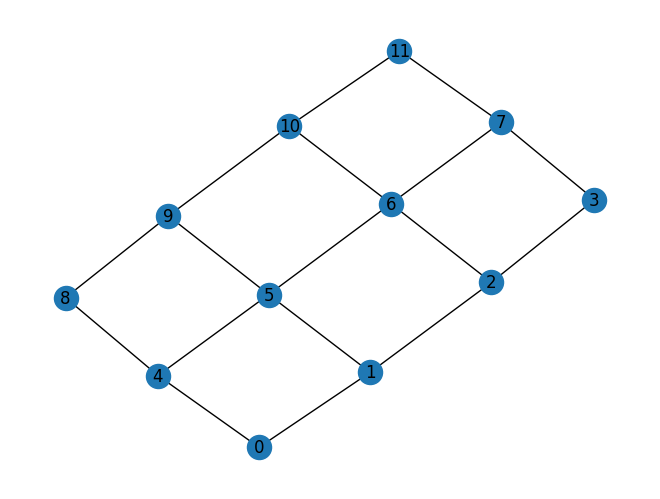

In [3]:
sim = Sim(network_info, controller_info, request_info)
sim.network.draw()
sim.set_file_data('resultados/analise_rede/proativo.csv')
sim.proactive_filling(proactive_params)
sim.proactive_process_requests()
sim.end()

### <b>Preenchimento Reativo</b>

In [4]:
# Inicializando a simulação
sim = Sim(network_info, controller_info, request_info)
sim.set_file_data('resultados/analise_rede/reativo.csv')
sim.reactive_process_requests()
sim.end()

[Time 0] Processando requisição R4EFAD0:10-6:0.89:9...
Dados do time-slot 0 registrados no arquivo 'resultados/analise_rede/reativo.csv'.
Dados do time-slot 1 registrados no arquivo 'resultados/analise_rede/reativo.csv'.
Dados do time-slot 2 registrados no arquivo 'resultados/analise_rede/reativo.csv'.
+---------+---------+--------+
| Match   | Route   | Rule   |
+=========+=========+========+
+---------+---------+--------+
[Time 3] Adicionando regra no Host 10
Decisão aplicada: (Normal E2E,)
+----------------------+---------+-----------+
| Match                | Route   | Rule      |
+======================+=========+===========+
| (6, (0.79, 0.99), 9) | [10, 6] | BasicRule |
+----------------------+---------+-----------+
[Time 3] Atendendo requisição R4EFAD0:10-6:0.89:9 no Host 10.
[BasicRule] Passo: 1
[BasicRule] Ação: CreateEPR(10-6)
[BasicRule] Passo: 1
[BasicRule] Ação: CreateEPR(10-6)
[BasicRule] Passo: 1
[BasicRule] Ação: CreateEPR(10-6)
[BasicRule] Passo: 1
[BasicRule] Ação: C

### <b>Preenchimento Híbrido</b>

In [5]:
# Inicializando a simulação
sim = Sim(network_info, controller_info, request_info)
sim.set_file_data('resultados/analise_rede/hibrido.csv')
sim.proactive_filling(proactive_params)
sim.reactive_process_requests()
sim.end()

Adicionando regras para 0
+----------------------+----------------------+--------------------+
| Match                | Route                | Rule               |
+======================+======================+====================+
| (0, (0.6, 0.7), 10)  | [0]                  | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (0, (0.8, 0.9), 10)  | [0]                  | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (1, (0.6, 0.7), 10)  | [0, 1]               | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (1, (0.8, 0.9), 10)  | [0, 1]               | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (2, (0.6, 0.7), 10)  | [0, 1, 2]            | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (2, (0.8, 0.9), 10)  | [0, 1, 2]            | BasicRuleProactive |
+-------

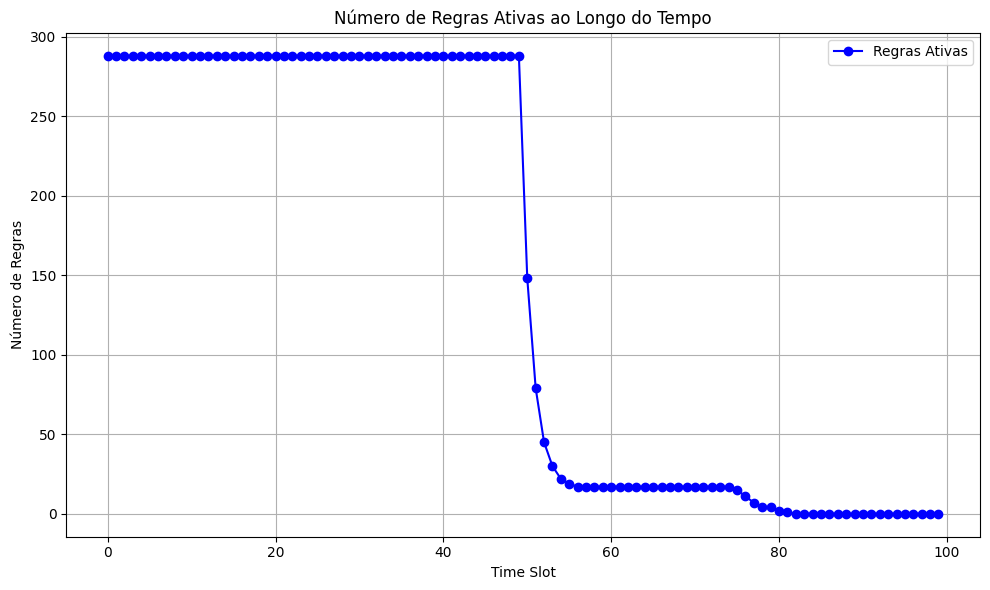

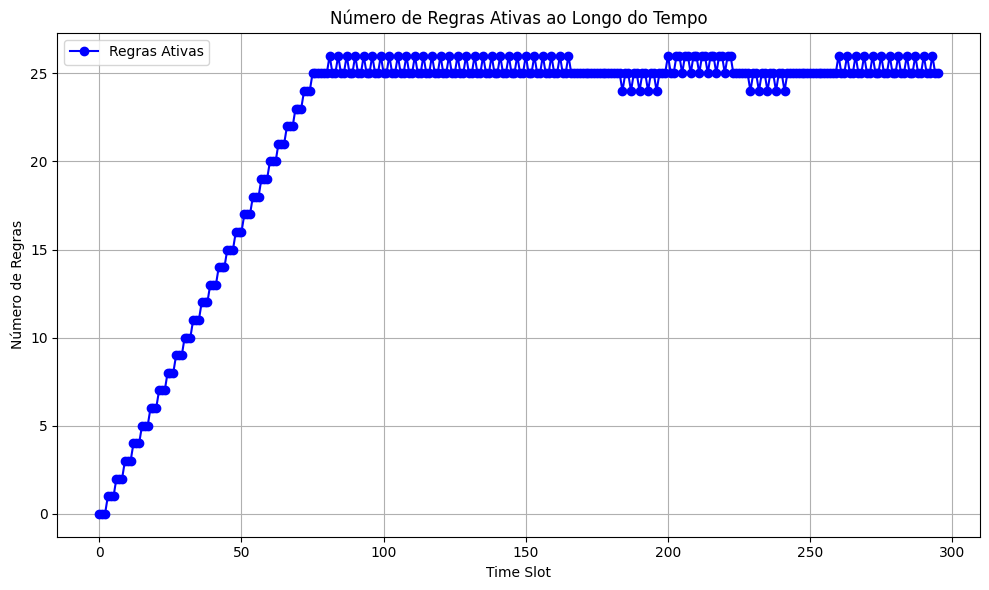

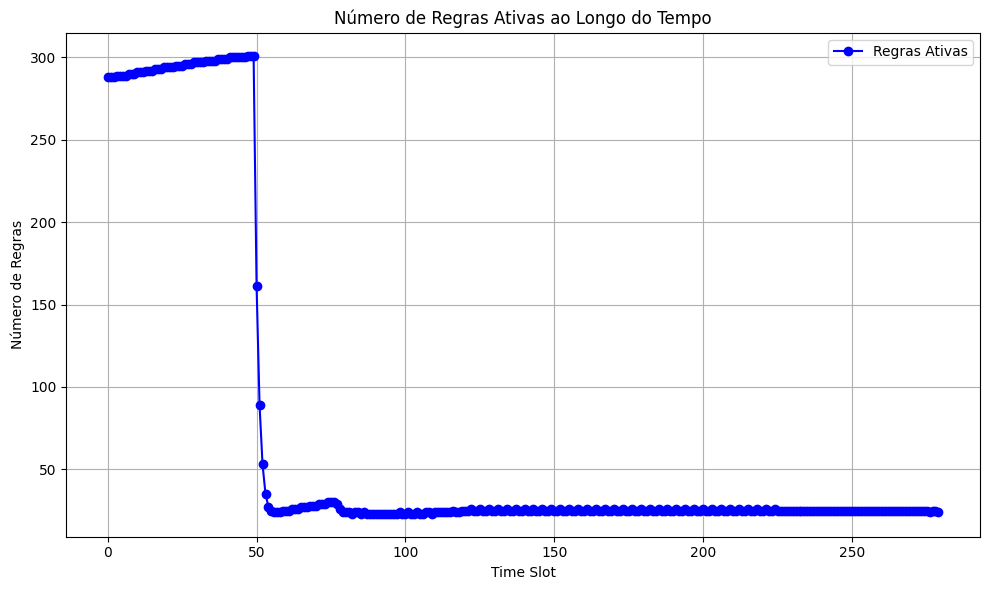

In [6]:
import csv
import matplotlib.pyplot as plt
def plot_rules_over_time(filename):
        """
        Gera um gráfico do número de regras ativas ao longo do tempo.
        """
        time_slots = []
        rules_active = []

        # Ler os dados do arquivo CSV
        with open(filename, mode="r", newline="") as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                time_slots.append(int(row["time_slot"]))
                rules_active.append(int(row["rules_active"]))

        # Criar o gráfico
        plt.figure(figsize=(10, 6))
        plt.plot(time_slots, rules_active, marker="o", linestyle="-", color="b", label="Regras Ativas")
        plt.title("Número de Regras Ativas ao Longo do Tempo")
        plt.xlabel("Time Slot")
        plt.ylabel("Número de Regras")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

plot_rules_over_time('resultados/analise_rede/proativo.csv')
plot_rules_over_time('resultados/analise_rede/reativo.csv')
plot_rules_over_time('resultados/analise_rede/hibrido.csv')

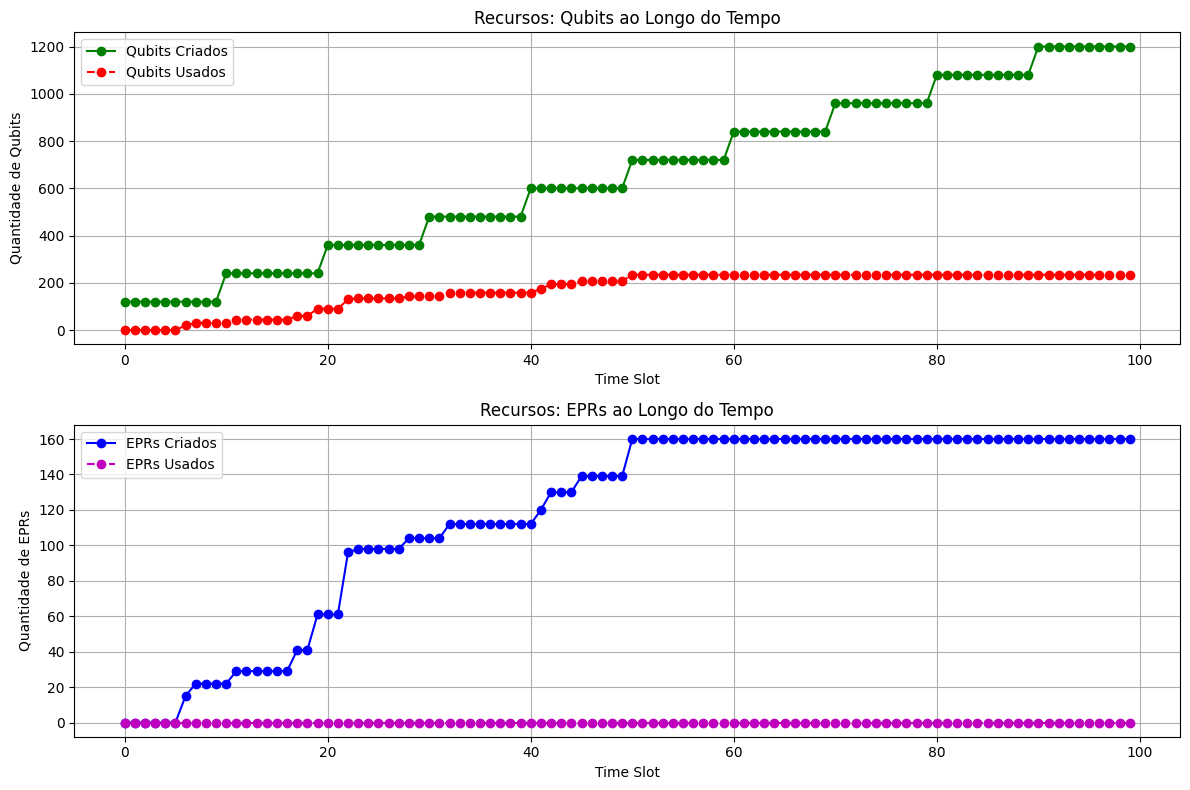

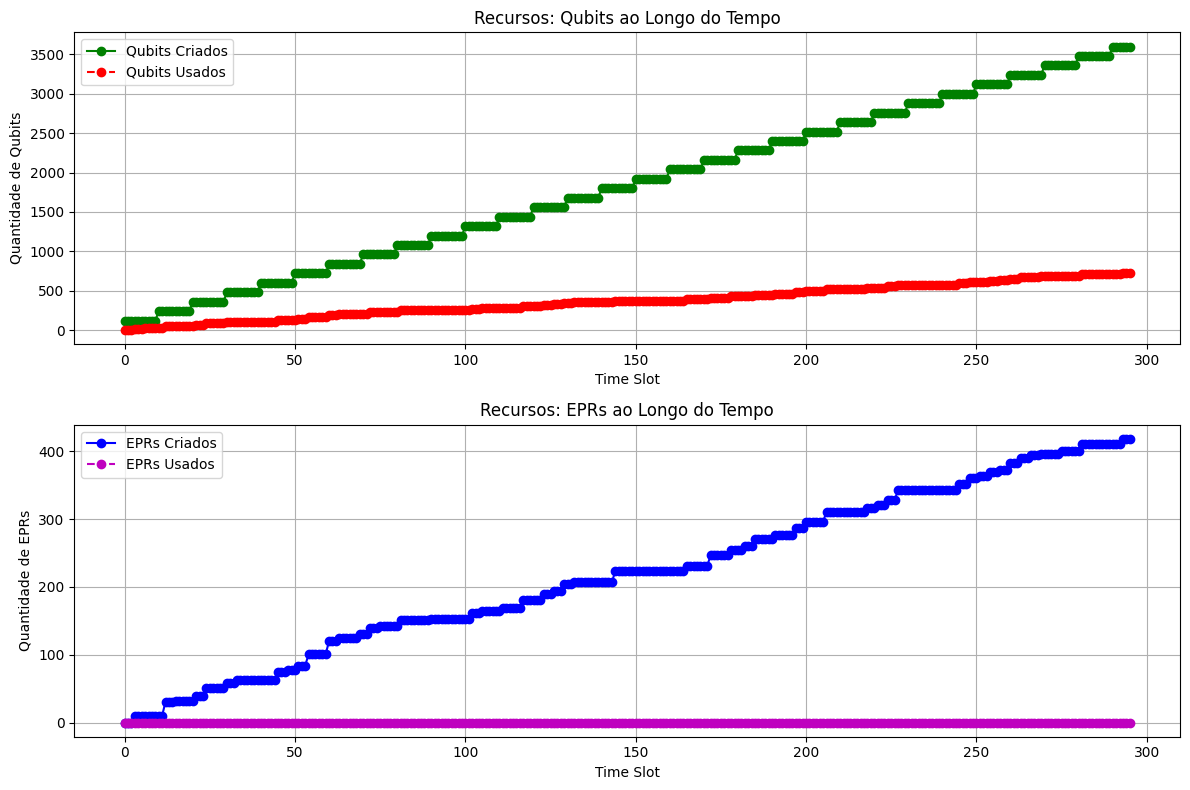

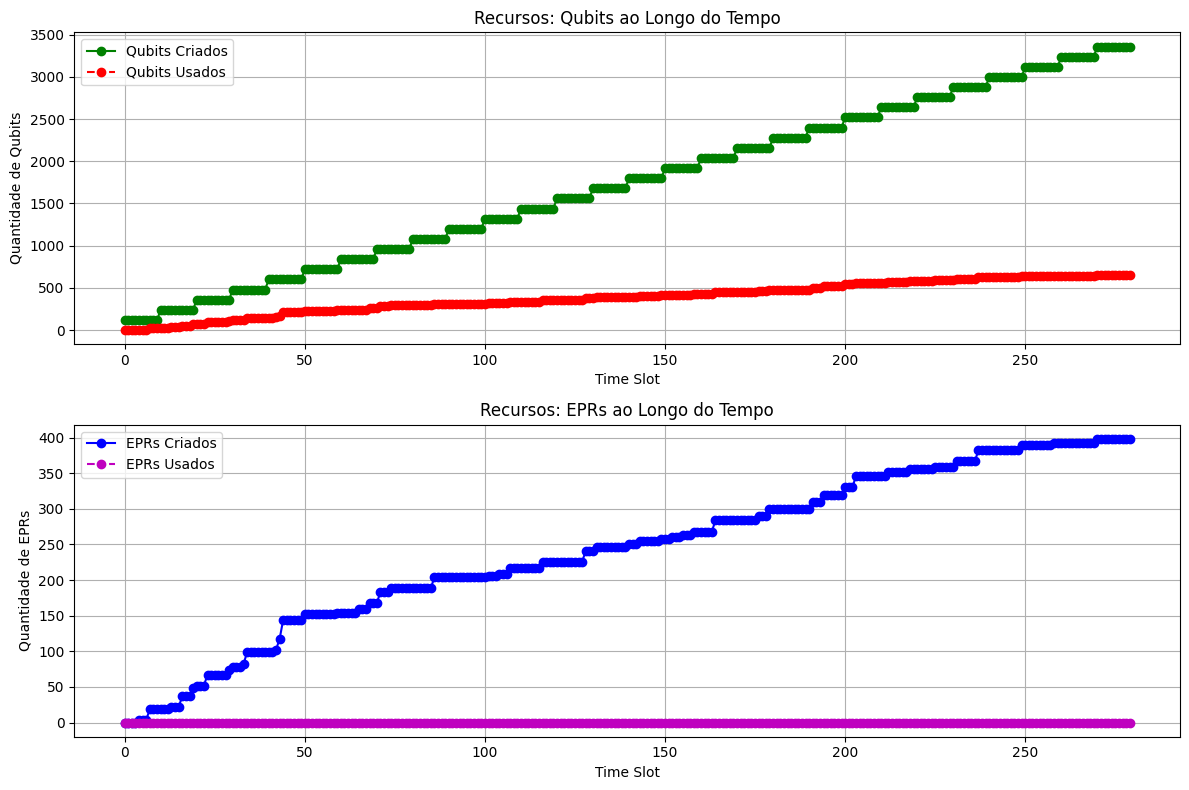

In [7]:
def plot_resources_over_time(filename):
    """
    Gera gráficos dos recursos criados e usados (qubits e EPRs) ao longo do tempo.
    """
    time_slots = []
    qubits_created = []
    qubits_used = []
    eprs_created = []
    eprs_used = []

    # Ler os dados do arquivo CSV
    with open(filename, mode="r", newline="") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            time_slots.append(int(row["time_slot"]))
            qubits_created.append(int(row["qubits_created"]))
            qubits_used.append(int(row["qubits_used"]))
            eprs_created.append(int(row["eprs_created"]))
            eprs_used.append(int(row["eprs_used"]))

    # Criar gráficos
    plt.figure(figsize=(12, 8))

    # Qubits
    plt.subplot(2, 1, 1)
    plt.plot(time_slots, qubits_created, marker="o", linestyle="-", color="g", label="Qubits Criados")
    plt.plot(time_slots, qubits_used, marker="o", linestyle="--", color="r", label="Qubits Usados")
    plt.title("Recursos: Qubits ao Longo do Tempo")
    plt.xlabel("Time Slot")
    plt.ylabel("Quantidade de Qubits")
    plt.grid(True)
    plt.legend()

    # EPRs
    plt.subplot(2, 1, 2)
    plt.plot(time_slots, eprs_created, marker="o", linestyle="-", color="b", label="EPRs Criados")
    plt.plot(time_slots, eprs_used, marker="o", linestyle="--", color="m", label="EPRs Usados")
    plt.title("Recursos: EPRs ao Longo do Tempo")
    plt.xlabel("Time Slot")
    plt.ylabel("Quantidade de EPRs")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()
    
plot_resources_over_time('resultados/analise_rede/proativo.csv')
plot_resources_over_time('resultados/analise_rede/reativo.csv')
plot_resources_over_time('resultados/analise_rede/hibrido.csv')


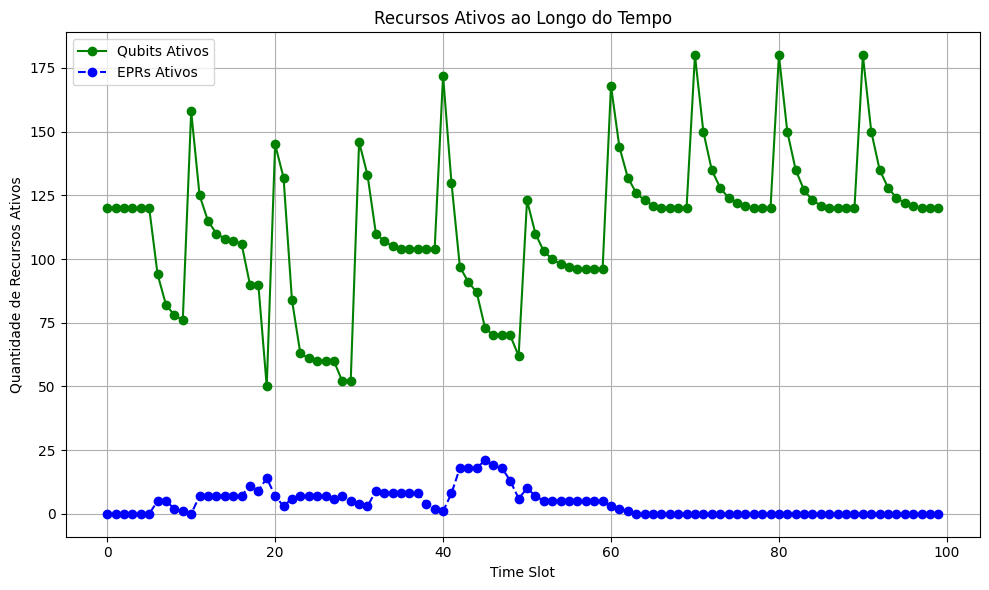

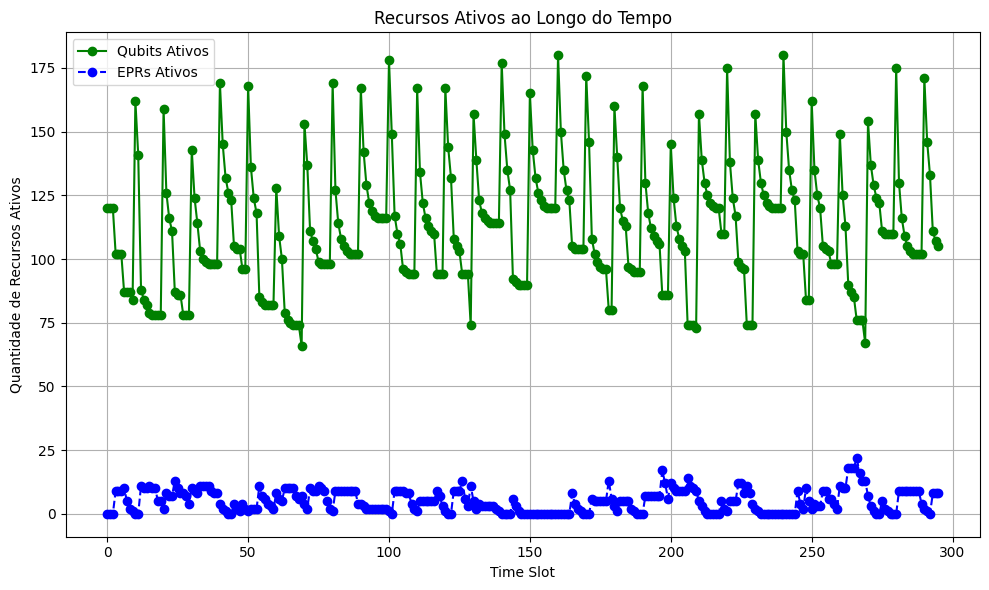

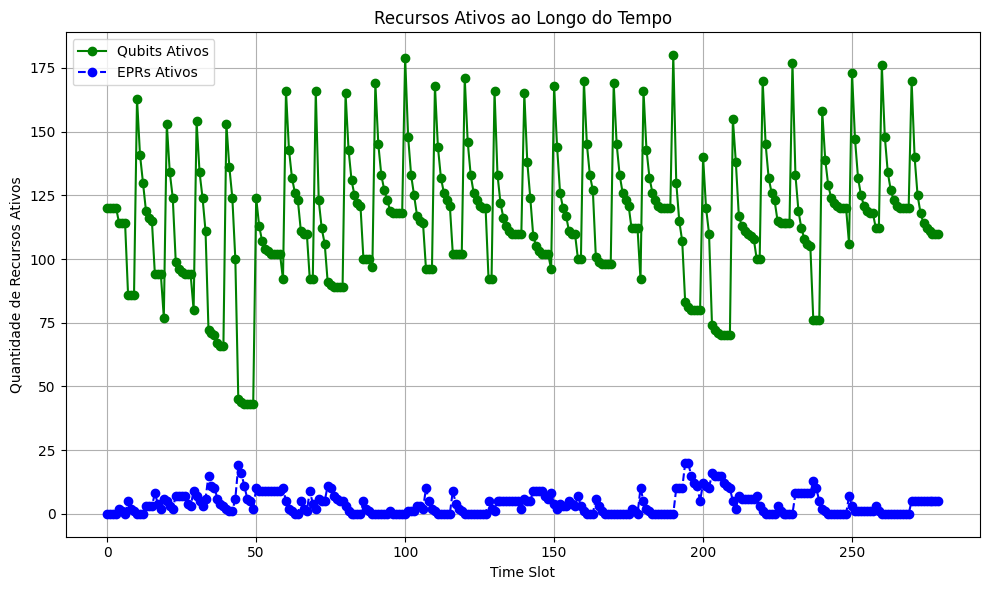

In [9]:
def plot_active_resources_over_time(filename):
    """
    Gera um gráfico do número de qubits e EPRs ativos ao longo do tempo.
    """
    time_slots = []
    qubits_active = []
    eprs_active = []

    # Ler os dados do arquivo CSV
    with open(filename, mode="r", newline="") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            time_slots.append(int(row["time_slot"]))
            qubits_active.append(int(row["qubits_active"]))
            eprs_active.append(int(row["eprs_active"]))

    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(time_slots, qubits_active, marker="o", linestyle="-", color="g", label="Qubits Ativos")
    plt.plot(time_slots, eprs_active, marker="o", linestyle="--", color="b", label="EPRs Ativos")
    plt.title("Recursos Ativos ao Longo do Tempo")
    plt.xlabel("Time Slot")
    plt.ylabel("Quantidade de Recursos Ativos")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_active_resources_over_time('resultados/analise_rede/proativo.csv')
plot_active_resources_over_time('resultados/analise_rede/reativo.csv')
plot_active_resources_over_time('resultados/analise_rede/hibrido.csv')